In [23]:
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
import konlpy
import nltk
# tokenizer import
from konlpy.tag import Komoran, Mecab, Okt, Twitter
%matplotlib inline
print('konlpy version = {}'.format(konlpy.__version__))

konlpy version = 0.5.2


In [172]:
dataset = pd.read_csv('total_dataset.csv', index_col = False)

In [173]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [174]:
train_data = dataset[:round(dataset.shape[0]*0.9)]

In [175]:
test_data = dataset[round(dataset.shape[0]*0.9):]

In [176]:
train_data['rank'].value_counts()

1    24648
0    24573
Name: rank, dtype: int64

In [177]:
test_data['rank'].value_counts()

0    2774
1    2695
Name: rank, dtype: int64

In [178]:
del dataset

In [71]:
# ko_tokenizer = Komoran()
# stopwords =['']

In [ ]:
# train_data.astype({'contents':'object'}).dtypes

In [14]:
# train_data = pd.read_csv('real_train_data.csv', index_col = False)
# test_data = pd.read_csv('real_test_data.csv', index_col = False)

In [179]:
train_data['contents'] = train_data['contents'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [180]:
test_data['contents'] = test_data['contents'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [181]:
train_data.drop(train_data[train_data.contents == ' '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '  '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '   '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '    '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '     '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '      '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '       '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '        '].index, inplace=True)

In [182]:
test_data.drop(test_data[test_data.contents == ' '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '  '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '   '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '    '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '     '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '      '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '       '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '        '].index, inplace=True)

In [183]:
train_data.dropna(subset = ['contents'], inplace = True)
test_data.dropna(subset = ['contents'], inplace = True)

In [ ]:
ko_tokenizer = Komoran()
stopwords =['']

In [184]:
s = time.time()
x_train = []
for i, sentence in enumerate(train_data.contents):
    temp_X = []
#     print(i)
    temp_X = list(ko_tokenizer.morphs(sentence)) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    x_train.append(temp_X)
    
print('sentence tokenizing time = {} sec'.format(time.time()-s))

sentence tokenizing time = 51.84955286979675 sec


In [185]:
s = time.time()
x_test = []
for sentence in test_data['contents']:
    temp_X = []
    temp_X = ko_tokenizer.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    x_test.append(temp_X)

print('sentence tokenizing time = {} sec'.format(time.time()-s))

sentence tokenizing time = 5.605151891708374 sec


In [186]:
tokens = [t for d in x_train for t in d]

In [187]:
len(tokens)

1675788

In [188]:
text = nltk.Text(tokens, name = 'NMSC')

In [189]:
#total token num
print(len(text.tokens))
#중복 제외한 토큰 개수
print(len((set(text.tokens))))
# 출현 빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))

1675788
26083
[('하', 84242), ('이', 57891), ('고', 42129), ('ㄴ', 29169), ('았', 28641), ('에', 27309), ('는', 26035), ('도', 23689), ('네요', 23281), ('어', 21088)]


In [ ]:
# import json
# import os 
# from pprint import pprint

# def tokenizer(doc):
#     # norm은 정규화, stem은 근어로 표시하기를 나타냄
#     komoran = Komoran()
#     return ['/'.join(t) for t in komoran.pos(doc)]

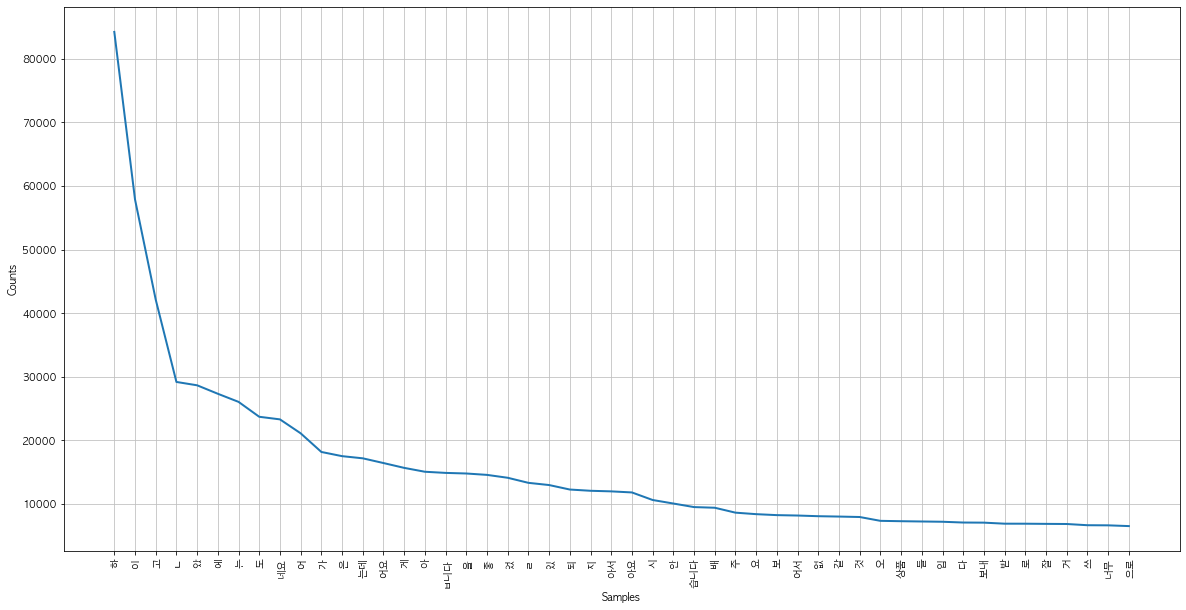

In [190]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = '/Library/Fonts/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [191]:
len(text.vocab())

26083

In [192]:
selected_words = [f[0] for f in text.vocab().most_common(len(text.vocab()))]

In [193]:
# x_train[0]

['물건',
 '이',
 '오기',
 '도전',
 '에',
 '반품',
 '이',
 '되',
 '엇',
 '다는데',
 '어떻',
 '게',
 '되',
 'ㄴ',
 '건',
 '가요',
 '신속',
 '한',
 '답변',
 '부탁',
 '하',
 'ㅂ니다']

In [194]:
import time
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]
s = time.time()
train_x = [term_frequency(d) for d in x_train]
test_x = [term_frequency(d) for d in x_test]
train_y = np.array(train_data['rank'])
test_y = np.array(test_data['rank'])
print('term_frequency calculation time = {}'.format(time.time()-s))

term_frequency calculation time = 716.2085030078888


In [195]:
len(train_x[0])

26083

In [196]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [197]:
import argparse
import sys

from tensorflow.keras import models
# from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Embedding, Input, Reshape, Flatten, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adagrad, Adam, SGD, RMSprop
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import multi_gpu_model

# sequence model building
def build_seq_model(args):
    model = models.Sequential()
    model.add(layers.Dense(1024, activation=args.activation, kernel_initializer='he_normal', input_shape=(args.vocab_size,)))
    model.add(layers.Dropout(args.dropout))
    model.add(layers.Dense(512, kernel_initializer='he_normal',activation=args.activation))
    model.add(layers.Dropout(args.dropout))
    model.add(layers.Dense(256, kernel_initializer='he_normal',activation=args.activation))
    model.add(layers.Dropout(args.dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    try:
        model = multi_gpu_model(model, cpu_relocation = True)
#         model = multi_gpu_model(model, gpus = 2, cpu_relocation = True)
        print('#'*100)
        print('====> training using multiple gpu')
        print('#'*50)
    except:
        print('#'*100)
        print('====> training using single gpu or cpu')
        print('#'*50)
    return model

# functional_api_model_building
def build_api_model(args):
    inputs = Input(shape = (args.vocab_size,))
    output = layers.Dense(1024, activation=args.activation, kernel_initializer='he_normal')(inputs)
    output = layers.Dropout(args.dropout)(output)
    output = layers.Dense(512, kernel_initializer='he_normal',activation=args.activation)(output)
    output = layers.Dropout(args.dropout)(output)
    output = layers.Dense(256, kernel_initializer='he_normal',activation=args.activation)(output)
    output = layers.Dropout(args.dropout)(output)
    output = layers.Dense(1, activation='sigmoid')(output)
    model = models.Model(inputs, output)
    try:
        model = multi_gpu_model(model, cpu_relocation = True)
#         model = multi_gpu_model(model, gpus = 2, cpu_relocation = True)
        print('#'*50)
        print('====> training using multiple gpu')
        print('#'*50)
    except:
        print('#'*50)
        print('====> training using single gpu or cpu')
        print('#'*50)
    return model

# bow_model =build_model()

# bow_model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split = 0.2)
# results = model.evaluate(x_test, y_test)

In [198]:
args = argparse.ArgumentParser()
# hyperparameter setup
args.vocab_size = len(text.vocab())
args.learner = 'adam'
args.activation = 'relu'
args.learning_rate = 0.001
args.dropout = 0.3
args.train_batch_size = 512
args.test_batch_size = 512
args.epoch = 50
args.validation_split = 0.2



# model save folder
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
checkpoint_path = 'model/cp_{}.ckpt'.format(time.strftime('%Y-%m-%d',time.localtime(time.time())))
checkpoint_dir = os.path.dirname(checkpoint_path)

# callback setup
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                 factor = 0.2,
                                 patience = 3,
                                 min_lr = 0.00001)

cp_callback = ModelCheckpoint(checkpoint_path,
                             save_weights_only = True,
                             save_best_only = True,
                             verbose = 1)
# build model
bow_model = build_api_model(args)

print(bow_model.summary())

if args.learner.lower() == "adagrad":
    bow_model.compile(optimizer=optimizers.Adagrad(lr=args.learning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])
elif args.learner.lower() == "rmsprop":
    bow_model.compile(optimizer=optimizers.RMSprop(lr=args.arglearning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])    
elif args.learner.lower() == "adam":
    bow_model.compile(optimizer=optimizers.Adam(lr=args.learning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])
else:
    args.bow_model.compile(optimizer=optimizers.SGD(lr=args.learning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])

history = bow_model.fit(x_train, y_train, 
              epochs=args.epoch, 
              batch_size=args.train_batch_size, 
              validation_split = args.validation_split, 
              callbacks = [earlystop, reduce_lr, cp_callback])

##################################################
====> training using single gpu or cpu
##################################################
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 26083)]           0         
_________________________________________________________________
dense_151 (Dense)            (None, 1024)              26710016  
_________________________________________________________________
dropout_75 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_152 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_76 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 256)         

In [199]:
bow_model = build_model()
bow_model.compile(optimizer=optimizers.Adam(lr=learning_rate),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])
loss, acc = bow_model.evaluate(x_test, y_test, batch_size = args.test_batch_size, verbose = 1)
print('loss = {:.3f} and acc = {:.3f}'.format(loss,acc))
bow_model.load_weights(checkpoint_path)
loss, acc = bow_model.evaluate(x_test, y_test, batch_size = args.test_batch_size, verbose = 1)
print('loss = {:.3f} and acc = {:.3f}'.format(loss,acc))

5469/5469 [==============================] - 2s 274us/sample - loss: 0.7039 - binary_accuracy: 0.4917
loss = 0.704 and acc = 0.492
5469/5469 [==============================] - 1s 145us/sample - loss: 0.1698 - binary_accuracy: 0.9340
loss = 0.170 and acc = 0.934


In [200]:
def predict_pos_neg(review):
    token = ko_tokenizer.morphs(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(bow_model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 긍정 예측\n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 부정 예측;\n".format(review, (1 - score) * 100))

In [171]:
while 1:
    tmp = input()
    if tmp =='exit':
        break 
    predict_pos_neg(tmp) 

남편이 너무 좋아해요
[남편이 너무 좋아해요]는 99.11% 확률로 긍정 예측

배송이 느려요
[배송이 느려요]는 95.83% 확률로 부정 예측;

배송이 느리기 하지만 아이가 편하게 잘쓰고 있습니다.
[배송이 느리기 하지만 아이가 편하게 잘쓰고 있습니다.]는 99.13% 확률로 긍정 예측

배송이 느려요
[배송이 느려요]는 95.83% 확률로 부정 예측;

비추입니다.
[비추입니다.]는 93.79% 확률로 부정 예측;

정말 최악이네요
[정말 최악이네요]는 98.07% 확률로 부정 예측;

다시 구매해요
[다시 구매해요]는 54.93% 확률로 긍정 예측

재구매 했습니다.
[재구매 했습니다.]는 91.23% 확률로 긍정 예측

늘 쓰는 상품입니다.
[늘 쓰는 상품입니다.]는 95.25% 확률로 긍정 예측

exit


In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, GlobalMaxPooling1D, MaxPooling1D
D = np.random.rand(10, 6, 10)

model = Sequential()
model.add(LSTM(16, input_shape=(6, 10), return_sequences=True))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='sgd')

# print the summary to see how the dimension change after the layers are 
# applied

print(model.summary())

# try a model with GlobalMaxPooling1D now

model = Sequential()
model.add(LSTM(16, input_shape=(6, 10), return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='sgd')

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 6, 16)             1728      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 16)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 10)                1080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 2,819
Trainable params: 2,819
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 6, 16)             1728      
_________________________

In [6]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 250)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)       